In [ ]:
Logistic Regression : is a technique used to solve these -> Classification problems.

Regression : (Linear Regression)
    1. home prices  2.Weather  3.Stock price       -->   ( predicted value is : continuous )
    

Classification : (Logistic Regression)                                                                                         
    1.Email (is spam or not)  2.Will customer buy life insurance or not. (predicted value is : Categorical)         
    3.Which party person vote for: a.Democratic, b.Republic, c.Independent             

In [ ]:
Classification Types :  
    1.Binary classification (ex: Will customer buy life insurance or not  1.Yes 2.No)                                          
    2.Multiclass Classification (ex: Which party a person is going to vote for  a.Democratic, b.Republic, c.Independent)

In [ ]:
In logistic Regression : we use Sigmoid or logit function line , inplace of linear eqn. line  for better prediction.

sigmoid :  S(x) = 1/(1+e^-x) ,     

e-euler no. (2.718)  ,  sigmoid : ranges between  0 to 1 .                                                                                             

if the output is more than 0.5  we can classify the outcome as 1  and  if it is less than 0.5  we can classify it as 0.        

<img src='sigmoid.png'>

In [ ]:
In linear reg.:  y=mx+b   ,
In sigmoid: y=1/(1+e^-(mx+b)) , convert the eqn. into S-shape.

### Using insurance dataset checking whether the customer buy insurance or not.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('insurance_data.csv')    # 0 : not purchased , 1 : purchased insurance
df.head()                                 

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


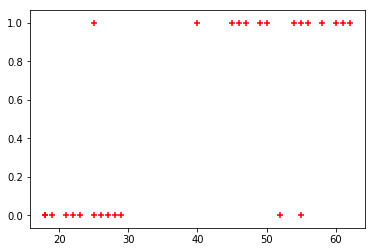

In [54]:
# x = df['age'].values.reshape(-1,1)
# y = df['bought_insurance'].values.reshape(-1,1)
plt.scatter(df.age,df.bought_insurance,color='red',marker='+')

# We can see that mostly above than 35 age customer buy insurance

In [4]:
from sklearn.model_selection import train_test_split

In [51]:
x = df[['age']]
y = df.bought_insurance
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [6]:
x_test

,age
18,19
7,60
11,28


In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
model = LogisticRegression()

In [9]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
model.predict(x_test)    # 0 : means customer not buy insurance , 1: means customer will buy 

array([0, 1, 0], dtype=int64)

In [11]:
model.score(x_test,y_test)

1.0

In [12]:
model.predict_proba(x_test)     # shows probability of customer buy insurance or not

array([[0.64328723, 0.35671277],
       [0.18112929, 0.81887071],
       [0.53221566, 0.46778434]])

In [13]:
model.predict([[25]])          # we can predict for specific age also 25 or 55.

array([0], dtype=int64)

## -----------------------------------------------------------------------------

## Case 2 

In [ ]:
Using : 'HR_comma_sep.csv' file, 
        checking on different variables whether the employee retain in company or not.

find:                                                                                                                           
    1.figure out which var. have direct and clear impact on employee retention(whether they leave company or continue work)    
    2.Plot bar charts showing impact of employee salary on retention                                                           
    3.Plot bar charts showing co-relation b/w department and employee retention                                                 
    4.Now build Logistic Regression model using var. that were narrowed down in step1                                          
    5.Measure the accuracy of model.                                                                                           

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df1 = pd.read_csv('D:/Data/HR_comma_sep.csv')
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
left = df1[df1.left==1]           # people left , left is a column
left.shape

(3571, 10)

In [6]:
retained = df1[df1.left==0]      # people retained
retained.shape

(11428, 10)

### Average no . of all columns

In [8]:
df1.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


##### Satisfaction Level : Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs retained ones (0.66).
##### Average Monthly Hours : Average monthly hours are higher in employees leaving the firm (199 vs 207)
##### Promotion Last 5 Years : Employees who are given promotion are likely to be retained at firm

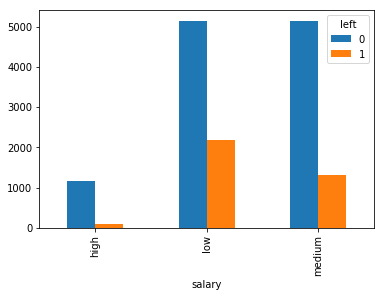

In [10]:
# Impact of salary on employee retention

pd.crosstab(df1.salary, df1.left).plot(kind='bar')

# employees with high salaries are likely to not leave the company

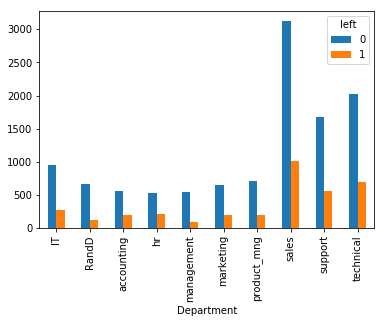

In [13]:
# Department wise employee retention rate

pd.crosstab(df1.Department, df1.left).plot(kind='bar')

# some impact of department on employee retention but it is not major hence we will ignore department in our analysis.

In [21]:
# So we conclude these var. have impact on employee retention taking as separate dataframe

new_df = df1[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
new_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [22]:
salary_dummies = pd.get_dummies(new_df.salary, prefix='salary')      # creating dummies for 'salary' column

In [26]:
df_dummies = pd.concat([new_df, salary_dummies], axis=1)         # concatenating dummies column 

In [28]:
df_dummies.drop('salary', axis=1, inplace=True)                # dropping 'salary' column, now we have dummies for that 
df_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [29]:
X = df_dummies
y = df1.left

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()      # creating model

model.fit(X_train, y_train)      # fit the data
model.predict(X_test)           # predict 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
print('Accuracy is :', model.score(X_test, y_test))

Accuracy is : 0.7862222222222223


## -----------------------------------------------------------------------

### Using another case,

In [ ]:
taking 'SocialNetwork Ads.csv' dataset checking whether the customer based on salary purchased product or not.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [37]:
X = dataset.iloc[:, [2,3]].values      # independent var.(Age, Estimated Salary)  we can also take Gender convert 1st into 0,1
y = dataset.iloc[:,4].values       # dependent var. (Purchased)

In [38]:
from sklearn.model_selection import train_test_split          # split dataset for train test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [42]:
# Now we minimize the difference b/w Salary , using feature Scaling 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)            # It has scaled the data -2 to 2
X_test = sc.fit_transform(X_test)

In [43]:
from sklearn.linear_model import LogisticRegression                 # creating model  and fitting the data

classifier = LogisticRegression(random_state=0, solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
y_pred = classifier.predict(X_test)             # Now predict the data

In [47]:
# Using confusion_matrix  how model performed (or predicted)

from sklearn.metrics import confusion_matrix ,accuracy_score

cm = confusion_matrix(y_test, y_pred)       # y_test : real data  , y_pred : predicted output.
acc = accuracy_score(y_test, y_pred)

print('Confusion matrix :\n', cm)
print(f'Accuracy of model is : {acc:0.1%}')

Confusion matrix :
 [[63  5]
 [ 7 25]]
Accuracy of model is : 88.0%


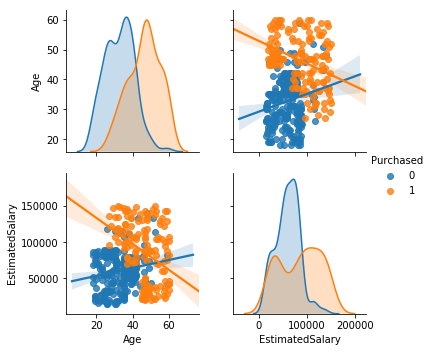

In [48]:
import seaborn as sns
sns.pairplot(dataset, vars=['Age','EstimatedSalary'], kind='reg', hue='Purchased')

## -----------------------------------------------------------------

# Multiclass  Classification

In [ ]:
Here we are taking the digits dataset of sklearn.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_digits            # using the preloaded dataset of sklearn 

In [4]:
digits = load_digits()

In [5]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [6]:
digits.data[0]    # data - has numeric data in array

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

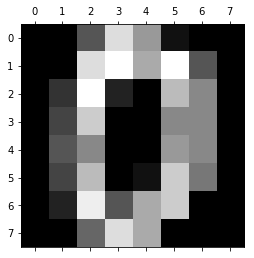

In [7]:
plt.gray()
plt.matshow(digits.images[0])   # images have image , and by plt.matshow() method we can display image

<Figure size 432x288 with 0 Axes>

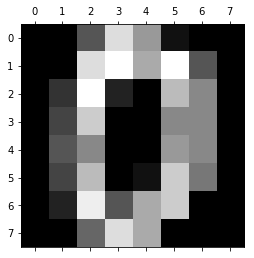

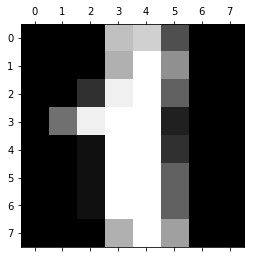

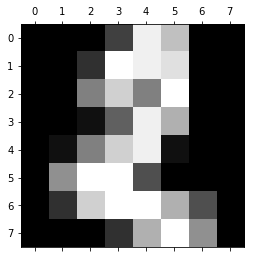

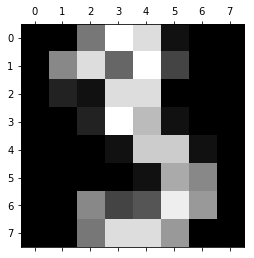

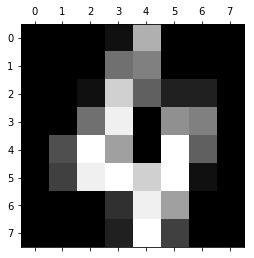

In [8]:
plt.gray()
for i in range(5):                      # we can display image upto 5
    plt.matshow(digits.images[i])

In [9]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [10]:
# so we use data and target to train data

from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [12]:
len(x_train)

1437

In [13]:
len(x_test)

360

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [15]:
model.fit(x_train,y_train)      # x_train: has handwritten characters, y_tarin: have coressponding output for an image  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
model.score(x_test, y_test)

0.9666666666666667

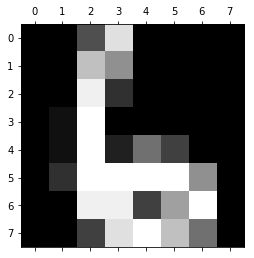

In [17]:
plt.matshow(digits.images[67])      # picking up random no.

In [18]:
digits.target[67]

6

In [19]:
model.predict([digits.data[67]])

array([6])

In [20]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [21]:
y_predicted = model.predict(x_test)

from sklearn.metrics import confusion_matrix            # confusion_matrix show how well is model organised

cm = confusion_matrix(y_test, y_predicted)
cm

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 41,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 36,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 32,  0,  0],
       [ 0,  3,  0,  1,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 32]], dtype=int64)

Text(69.0, 0.5, 'Truth')

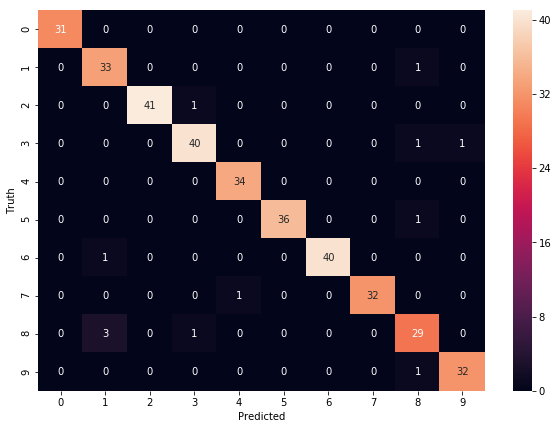

In [23]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')